# A quick look at CAA river Barium data 

In [1]:
import sys
sys.path.insert(0, '_libs/')
import NEMO_tools as Nts
from Mat2Py import datenum2datetime, datetime2datenum_single

In [2]:
import glob
import scipy.io
import datetime
import numpy as np
import matplotlib.pyplot as plt
#from seaborn import xkcd_rgb as xcolor
% matplotlib inline
from mpl_toolkits.basemap import Basemap, cm

In [233]:
RB=[0.25, 0.41, 0.88]    # Royal blue
AM=[0.90, 0.17, 0.31]    # Amathran

In [224]:
MAT = scipy.io.loadmat('../../Arctic-obs/MATLAB files/KBrown_Ba.mat')
lat = np.squeeze(MAT['lat'])
lon = np.squeeze(MAT['lon'])
River_names = MAT['River_names']
Ba = MAT['Ba']; time = datenum2datetime(MAT['Time'][:, 0])
Ba_CPM = MAT['Ba_CPM']; time_CPM = datenum2datetime(MAT['Time_CPM'][:, 0])
Ba_FC = MAT['Ba_FC']; time_FC = datenum2datetime(MAT['Time_FC'][:, 0])

In [11]:
names = ["" for x in range(len(Ba))]
for i in  range(len(Ba)):
    names[i] = str(River_names[i][0][0][0:12])

In [210]:
text_pad_x = np.array([-1, -1, -1, -1, -1, -3.5, -1, -1, 0.2, 0.3, -1, -2.2, -0.5, -1, -1, -1, -3.3, -1, -1, -0.8, 0.3, -1.7, -1, -1, -0.8, 0.2])
text_pad_y = np.array([0.4, 1.8, -0.8, -1, 1, 0, 1.2, 0.5, 0, 0, 1.25, -1.5, 1, -2, 1, -1.2, 0, 1, -1, -1.5, 0, -1.7,  0.4,  0, 0.6, 0])
text_lon = lon + text_pad_x*2
text_lat = lat + text_pad_y*0.2

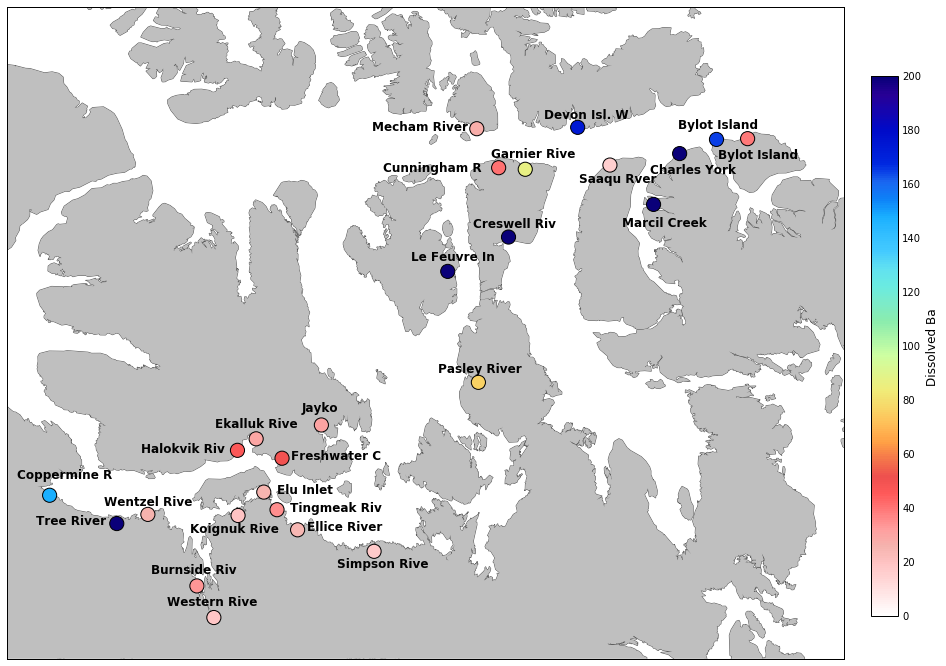

In [218]:
fig=plt.figure(figsize=(15, 15)); ax=plt.gca()
proj=Basemap(projection='eqdc', lat_0=center_lat, lon_0=center_lon, resolution='i', 
             llcrnrlon=-115, llcrnrlat=65, urcrnrlon=-70, urcrnrlat=75)
proj.drawcoastlines(linestyle='-', color=[0.35, 0.35, 0.35], linewidth=1, zorder=1)
proj.fillcontinents(color=[0.75, 0.75, 0.75], lake_color=None, zorder=2) # coral
x, y=proj(lon, lat)
text_x, text_y=proj(text_lon, text_lat)

CS = proj.scatter(x, y, c=Ba, vmin=0, vmax=200, s=200, cmap=cm.GMT_haxby_r, zorder=3)
proj.plot(x_CPM, y_CPM, 'r*')
for i in range(len(x)):
    plt.text(text_x[i], text_y[i], names[i], fontsize=12, fontweight='bold')

cax = fig.add_axes([0.925, 0.25, 0.025, 0.5])
CBar=plt.colorbar(CS, cax=cax)
CBar.set_label('Dissolved Ba', fontsize=12)
CBar.ax.tick_params(axis='y', length=0)

fig.savefig('_publish/CAA.png', dpi=600, orientation='portrait', papertype='a4', format='png',
                bbox_inches='tight', pad_inches=0.1)

In [228]:
CPM_monmean, CPM_Ba_monmean, _ = Nts.bin_monmean(time_CPM, Ba_CPM)
FC_monmean, FC_Ba_monmean, _ = Nts.bin_monmean(time_FC, Ba_FC)

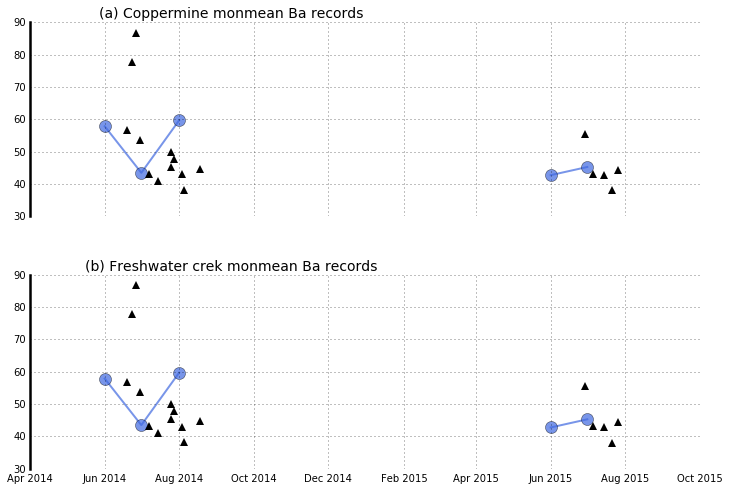

In [244]:
fig = plt.figure(figsize=(12, 8))
ax1=plt.subplot2grid((2, 1), (0, 0), colspan=1, rowspan=1)
ax2=plt.subplot2grid((2, 1), (1, 0), colspan=1, rowspan=1)
AX = [ax1, ax2]
for num in range(2):
    [i.set_linewidth(2.5) for i in AX[num].spines.itervalues()]
    #AX[num].yaxis.grid(True)
    AX[num].grid(linestyle=':')
    AX[num].tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="off", left="off", right="off", labelleft="on")
    AX[num].spines["top"].set_visible(False)
    AX[num].spines["bottom"].set_visible(False) 
    AX[num].spines["right"].set_visible(False) 
    AX[num].set_xlim([datetime.date(2014, 4, 1), datetime.date(2015, 10, 1)])
AX[-1].tick_params(labelbottom='on')
plt.subplots_adjust(hspace = 0.3)

AX[0].plot(CPM_monmean, CPM_Ba_monmean, 'o-', c=RB, ms=12, lw=2, alpha=0.7)
AX[0].plot(time_CPM, Ba_CPM, '^', c='k', ms=8, mew=0)
AX[0].set_title('(a) Coppermine monmean Ba records', x=0.3, fontsize=14)

AX[1].plot(FC_monmean, FC_Ba_monmean, 'o-', c=RB, ms=12, lw=2, alpha=0.7)
AX[1].plot(time_FC, Ba_FC, '^', c='k', ms=8, mew=0)
AX[1].set_title('(b) Freshwater crek monmean Ba records', x=0.3, fontsize=14)

In [238]:
Ba_CPM

array([[ 56.82306233],
       [ 86.87449893],
       [ 44.68273141],
       [ 43.20952364],
       [ 43.06123469],
       [ 45.30359712],
       [ 49.88437101],
       [ 41.11005939],
       [ 38.16658317],
       [ 53.71282078],
       [ 47.7523508 ],
       [ 77.80330577],
       [ 42.77470095],
       [ 43.2021535 ],
       [ 44.4374865 ],
       [ 55.44360898],
       [ 38.12831034]])